### Difference between Diffusion PDE and Brownian Motion SDE

Key difference:
* **Diffusion Equation** describes the development of a heat or concentration field on the level of a continuum.
* **Brownian Motion** describes the stochastic displacement of a particle

### Brownian Motion (or Wiener Process)

- **Nature**: Stochastic (random) process.
- **Description**: Describes the random motion of particles suspended in a fluid (liquid or gas) due to their collision with the surrounding fluid molecules.
- **Perspective**: Tracks the position or displacement of a single particle undergoing random motion.
- **Equation Type**: Stochastic differential equation.
- **Key Equation**: $ dX_t = \mu dt + \sigma dW_t $ where $ dW_t $ is a Wiener process, and $ \mu $ and $ \sigma $ are constants.

### Diffusion Equation (or Heat Equation)

- **Nature**: Partial differential equation.
- **Description**: Describes how substances like solutes spread through space and time or how heat spreads.
- **Perspective**: Deals with the distribution or concentration of a substance or quantity (like heat) within a region. Doesn't track individual particles but looks at concentration changes in the continuum.
- **Equation Type**: Deterministic partial differential equation.
- **Key Equation**: $ \frac{\partial u}{\partial t} = D \nabla^2 u $ where $ D $ is the diffusion coefficient and $ \nabla^2 $ is the Laplacian operator.

### Physics of Diffusion PDE

Physics-based explanation of diffusion equation: $\frac{\partial u}{\partial t} = D \nabla^2 u$

The Laplacian operator, $\nabla$, appears in the diffusion equation because it measures the spatial variation of a scalar field. It is not directly related to the quadratic displacement but rather captures how the concentration (or temperature, or any scalar quantity) at a point differs from its immediate surroundings.

1. **Gradient** ($\nabla$): The gradient of a scalar field provides a vector that points in the direction of the steepest increase of the field. Its magnitude gives the rate of increase in that direction. Essentially, the gradient captures the "slope" of the field at a particular point.

2. **Divergence** ($\nabla \cdot$): When applied to a vector field, the divergence gives a scalar value that represents the tendency of the vector field to originate from or converge to a point. It can be thought of as measuring the "outflow" minus the "inflow" at a given point.

3. **Laplacian** ($\nabla^2$): The Laplacian of a scalar function is the divergence of its gradient. Mathematically, $\nabla^2 u = \nabla \cdot \nabla u$. The Laplacian measures how a point's value differs from its average value in the vicinity. If $\nabla^2 u > 0$ at a point, then $u$ is locally lower than its neighbors. If $\nabla^2 u < 0$, $u$ is locally higher than its neighbors.

In the context of the diffusion equation, the Laplacian $\nabla^2 u$ measures the local spatial variation in the concentration $u$. The equation says that the temporal change in $u$ (i.e., how $u$ changes with time) is proportional to the spatial variation in $u$. When there's a high spatial gradient (i.e., one region has much higher concentration than its neighbors), diffusion acts to "smooth" it out, leading to changes in concentration over time.

In summary, the Laplacian operator is chosen in the diffusion equation because it effectively captures the spatial variation in the concentration of a diffusing substance. Diffusion acts to level out these spatial variations, making regions of high and low concentration tend towards equilibrium.

The Laplacian operator basically captures the sources and sinks of the gradient field:



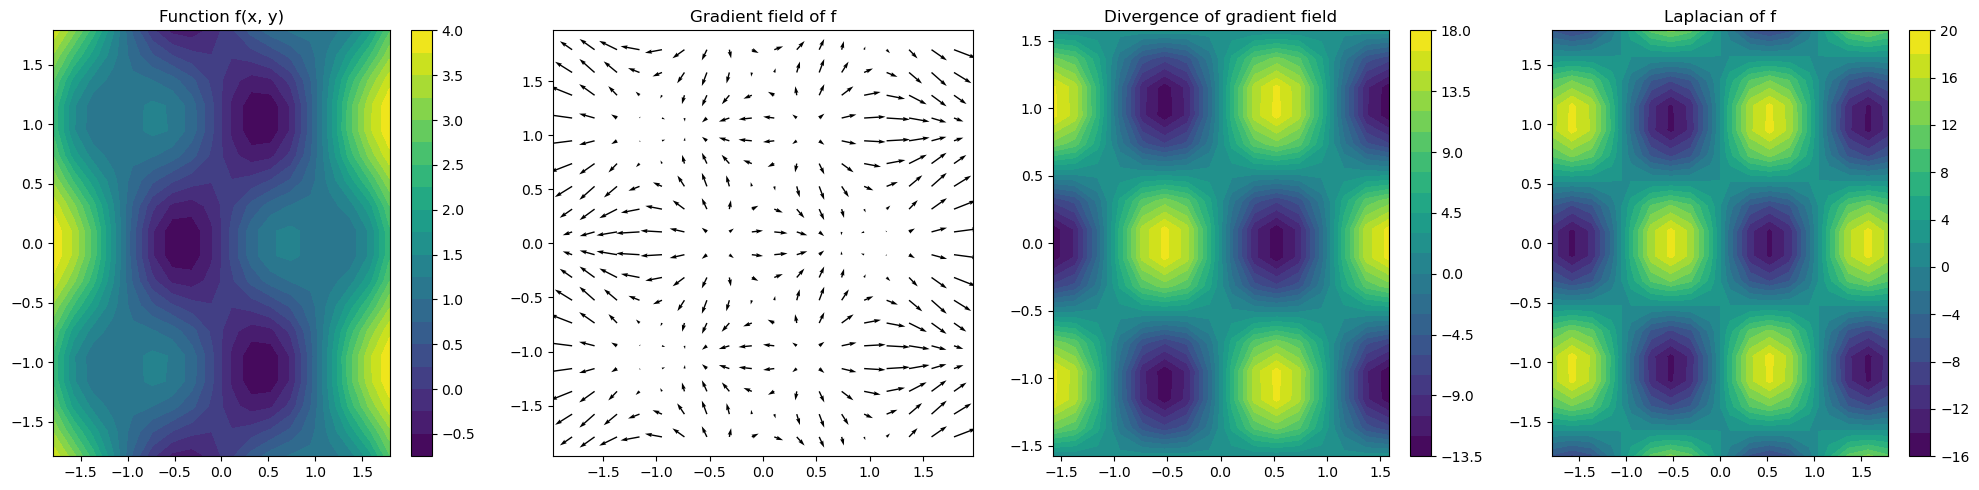

In [18]:

import numpy as np
import matplotlib.pyplot as plt

def compute_gradient(Z, h):
    """Compute gradient using central difference."""
    dZdx = (Z[:, 2:] - Z[:, :-2]) / (2*h)
    dZdy = (Z[2:, :] - Z[:-2, :]) / (2*h)
    
    # Remove border to keep consistent dimensions
    return dZdx[1:-1, :], dZdy[:, 1:-1]

def compute_divergence(U, V, h):
    """Compute divergence using central difference."""
    dUdx = (U[:, 2:] - U[:, :-2]) / (2*h)
    dVdy = (V[2:, :] - V[:-2, :]) / (2*h)
    
    # Remove border to keep consistent dimensions
    return dUdx[1:-1, :] + dVdy[:, 1:-1]

def compute_laplacian(Z, h):
    """Compute Laplacian using central difference."""
    dZxx = (Z[:, 2:] - 2*Z[:, 1:-1] + Z[:, :-2]) / h**2
    dZyy = (Z[2:, :] - 2*Z[1:-1, :] + Z[:-2, :]) / h**2
    
    # Remove border to keep consistent dimensions
    return dZxx[1:-1, :] + dZyy[:, 1:-1]



# Create a grid of points
num_gridpoints = 20
x = np.linspace(-2, 2, num_gridpoints)
y = np.linspace(-2, 2, num_gridpoints)
X, Y = np.meshgrid(x, y)
h = x[1] - x[0]

# Sample function: multiple hills
Z = np.sin(3*X) * np.cos(3*Y) + X**2

U, V = compute_gradient(Z, h)
divergence = compute_divergence(U, V, h)
Lap = compute_laplacian(Z, h)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Original function
c = axs[0].contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], Z[1:-1, 1:-1], 20, cmap='viridis')
fig.colorbar(c, ax=axs[0])
axs[0].set_title("Function f(x, y)")

# Gradient field
axs[1].quiver(X[1:-1, 1:-1], Y[1:-1, 1:-1], U, V)
axs[1].set_title("Gradient field of f")

# Divergence of the field
c = axs[2].contourf(X[2:-2, 2:-2], Y[2:-2, 2:-2], divergence, 20, cmap='viridis')
fig.colorbar(c, ax=axs[2])
axs[2].set_title("Divergence of gradient field")

# Laplacian
c = axs[3].contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], Lap, 20, cmap='viridis')
fig.colorbar(c, ax=axs[3])
axs[3].set_title("Laplacian of f")

plt.tight_layout()
plt.show()